In [10]:
from utils import (
    load_data,
    train_model,
    evaluate_model,
    load_siRF_result,
)
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MaxNLocator
import pickle as pk

In [6]:
final_results = {}
name = "Enhancer_new_permutation"
for rule in ["and", "or", "add"]:
    for ind in tqdm(range(50)):
        X, y, y_true = load_data(ind, name, rule, permute_columns=False, gaussian=False)
        y_pred = train_model(X, y, iter=ind, weight_scheme='depth',
                             bootstrap=True, name=name, rule=rule, threshold=0, cache_after_run=False, use_cache=False)
        result = evaluate_model(y_pred, y_true, name, metric='mild')
        final_results[(rule, ind, 'standard')] = result
        X, y, y_true = load_data(ind, name, rule, permute_columns=True, gaussian=False)
        y_pred = train_model(X, y, iter=ind, weight_scheme='depth',
                             bootstrap=True, name=name, rule=rule, threshold=0, cache_after_run=False, use_cache=False)
        result = evaluate_model(y_pred, y_true, name, metric='mild')
        final_results[(rule, ind, 'independent')] = result
        X, y, y_true = load_data(ind, name, rule, permute_columns=False, gaussian=True)
        y_pred = train_model(X, y, iter=ind, weight_scheme='depth',
                             bootstrap=True, name=name, rule=rule, threshold=0, cache_after_run=False, use_cache=False)
        result = evaluate_model(y_pred, y_true, name, metric='mild')
        final_results[(rule, ind, 'gaussian')] = result

100%|██████████| 50/50 [28:15<00:00, 33.91s/it]


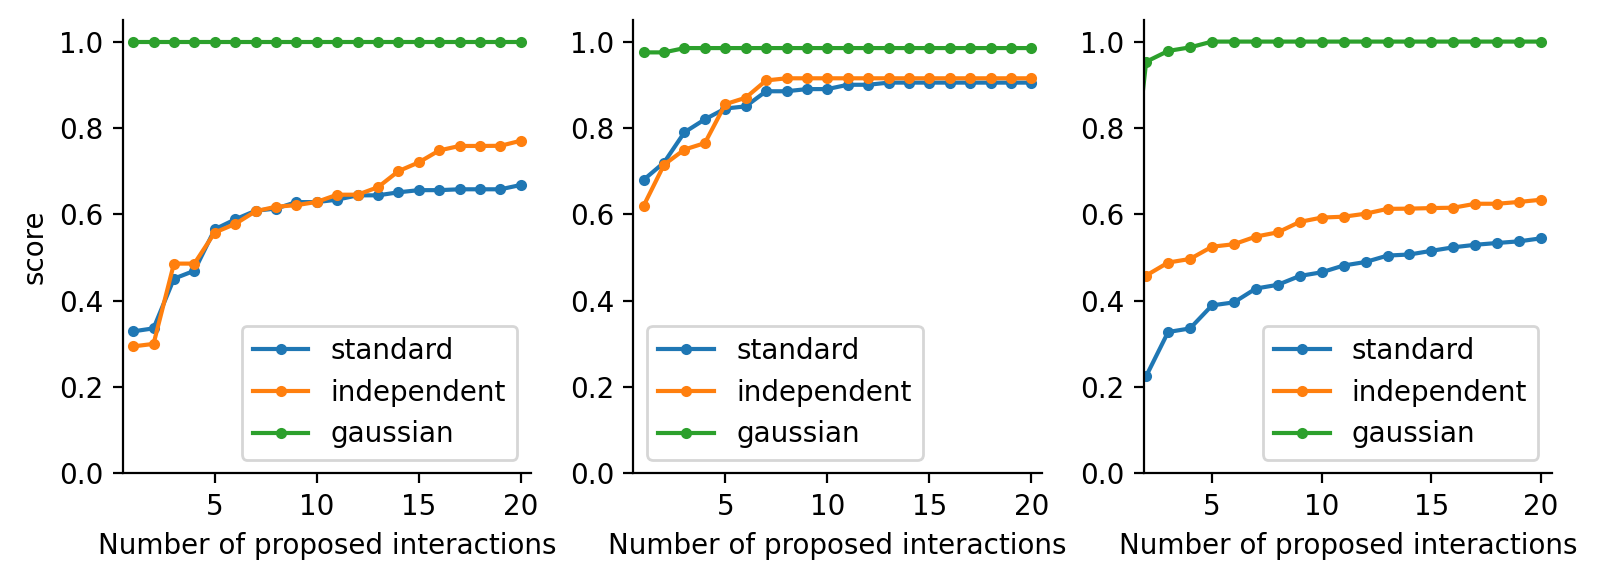

In [9]:
fig, axes = plt.subplots(1,3, figsize=(8,3), sharey=False, dpi=200)
name 
for j, rule in enumerate(["and", "or", "add"]):
    ax = axes[j]
    min_length = 20
    for k, features in enumerate(['standard', 'independent', 'gaussian']):
        scores = []
        for x, v in final_results.items():
            if x[0] == rule and x[-1] == features:
                if len(v) < min_length:
                    v = list(v) + [np.nan] * (min_length - len(v))
                scores.append(v[:min_length])
        scores = np.array(scores)
        ax.errorbar(
            np.arange(1, min_length+1),
            np.nanmean(scores, axis=0),
            marker='.',
            #yerr = np.std(np.array([list(v)[:min_length] for x, v in final_results.items() if x[0] == name and x[1] == rule]), axis=0) / 50 ** .5,
        )
                    
    ax.set_ylim([0,1.05])
    if rule == 'add':
        ax.set_xlim([1.9, 20.5])
    else:
        ax.set_xlim([0.5, 20.5])
    ax.legend(['standard', 'independent', 'gaussian'])
    #ax.set_title("Exp: " + f1[name] + "-" + f2[rule.upper()], fontsize=10)
    #ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    if j==0:
        ax.set_ylabel("score")
    ax.set_xlabel("Number of proposed interactions")

plt.tight_layout()
plt.show()

In [11]:
with open("042_save.pickle", "wb") as f:
    pk.dump(final_results, f)

In [12]:
X, y, y_true = load_data(ind, name, rule, permute_columns=False, gaussian=False)

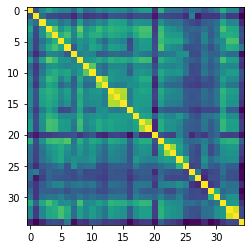

In [14]:
plt.imshow(np.corrcoef(X.T))

kr


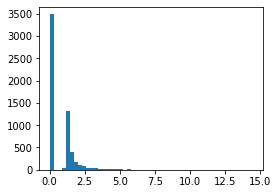

In [20]:
fig, ax = plt.subplots(figsize=(4,3))
plt.hist(X[:,18],50)
mask = ["zld", "bcd", "bcd", "cad", "D", "da", "dl", "ftz", "gt", "h",
         "h", "hb", "hb", "hkb", "hkb", "hkb", "kni", "kni", "kr", "kr", 
         "mad", "med", "prd", "prd", "run", "run", "shn", "shn", "slp1", "sna", 
         "sna", "tll", "twi", "twi", "z"]
print(mask[18])
plt.show()